# Load packages.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the dataset for this chunk (7/10).
Chunk 1 used for fine tuning.

In [2]:
df = pd.read_csv('C:/Users/rmcarri/OneDrive - Emory University/NHANES/Macronutrients LLMs/03.Results/Adolescents/FT 10epochs v2/df_val_with_answers_chunk7.csv')
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Fine_Tuned
0,0,69080,2,"MILK, COW'S, FLUID, 1% FAT (488); BOLOGNA, NFS...",2785,93.89,372.53,131.56,24.2,106.44,...,4,0.86,NaN,0.0,0.0,0.0,NaN,69080_NHANES_2011_2012,2785; 93.89; 372.53; 131.56; 24.2; 106.44,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1,1,69083,2,"MILK, COW'S, FLUID, 2% FAT (76.25); MILK, COW'...",1726,81.13,204.66,91.67,15.9,69.53,...,3,0.84,NaN,0.0,0.0,NaN,NaN,69083_NHANES_2011_2012,1726; 81.13; 204.66; 91.67; 15.9; 69.53,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
2,2,69093,2,"MILK, COW'S, FLUID, SKIM OR NONFAT (122.5); MI...",1959,83.87,301.26,177.18,23.0,49.20,...,5,2.60,NaN,0.0,0.0,0.0,NaN,69093_NHANES_2011_2012,1959; 83.87; 301.26; 177.18; 23.0; 49.2,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
3,3,69098,2,CHICKEN NUGGETS (128); TAMALE WITH CHICKEN (38...,2999,114.15,300.14,104.53,18.0,150.82,...,1,1.34,NaN,0.0,0.0,NaN,NaN,69098_NHANES_2011_2012,2999; 114.15; 300.14; 104.53; 18.0; 150.82,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
4,4,69116,2,"MILK, COW'S, FLUID, 1% FAT (442.25); PEANUT BU...",2680,91.04,368.46,119.96,19.0,94.97,...,3,3.04,NaN,0.0,0.0,NaN,NaN,69116_NHANES_2011_2012,2680; 91.04; 368.46; 119.96; 19.0; 94.97,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,81129,2,"CHEESEBURGER, W/ MAYO & TOMATO/CATSUP, ON BUN\...",1263,26.94,182.00,107.21,6.3,48.25,...,4,3.18,NaN,0.0,0.0,NaN,NaN,81129_NHANES_2013_2014,1263; 26.94; 182.0; 107.21; 6.3; 48.25,USER:\n\nPlease analyze the patient's dietary ...
1124,1124,81130,2,"MILK, WHOLE (442.25); MILK, WHOLE (320.25); AL...",4248,156.60,343.85,95.34,15.2,249.54,...,5,5.00,NaN,0.0,0.0,0.0,0.0,81130_NHANES_2013_2014,4248; 156.6; 343.85; 95.34; 15.2; 249.54,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1125,1125,81133,2,"MILK, WHOLE (259.25); BEEF, NS AS TO CUT, COOK...",2547,66.86,342.69,138.18,14.0,103.53,...,3,0.86,NaN,0.0,0.0,0.0,NaN,81133_NHANES_2013_2014,2547; 66.86; 342.69; 138.18; 14.0; 103.53,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1126,1126,81150,2,"MILK, LOW FAT (1%) (244); CHICK, BRST, COAT,BK...",1130,54.41,121.43,51.96,4.0,47.54,...,1,0.70,NaN,0.0,0.0,NaN,NaN,81150_NHANES_2013_2014,1130; 54.41; 121.43; 51.96; 4.0; 47.54,USER:\n\nPlease analyze the patient's dietary ...


# The output from the fine tuned model needs post-processing.
Post-process the output of the fine-tuned model.

Verify the new (post-processed) output is accurate.

Drop rows that cannot be post-processed (i.e., in a completely wrong format or did not yield the desired information).

In [3]:
# Post-process the LLM_Fine_Tuned content
def extract_numbers_after_response(text):
    response_section = text.split("### Response:")[-1].strip()   # Find everything after "### Response:"
    return "; ".join(response_section.split(";"))   # Extract the numbers and join them with semicolons

# Apply the function to your DataFrame column
df['LLM_Fine_Tuned'] = df['LLM_Fine_Tuned'].apply(extract_numbers_after_response)

In [4]:
# Function to validate the pattern
def validate_pattern(value):
    parts = [part.strip() for part in value.split(';')]
    expected_count = 6  # Expected number of values
    
    # Check number of values
    if len(parts) != expected_count:
        return False
    
    # Check each value is a valid number
    for part in parts:
        try:
            float(part)
        except ValueError:
            return False
            
    return True

# Apply validation and create boolean mask
mask = df['LLM_Fine_Tuned'].apply(validate_pattern)

# Show inconsistent rows
inconsistent_rows = df[~mask]
print("Inconsistent rows:")
# Show summary statistics
print("\nSummary:")
print(f"Total rows: {len(df)}")
print(f"Inconsistent rows: {len(inconsistent_rows)}. I.e., these rows need post-processing.")
print(f"Consistent rows: {sum(mask)}. I.e., all rows are as expected, not need to post-process.")
inconsistent_rows

Inconsistent rows:

Summary:
Total rows: 1128
Inconsistent rows: 57. I.e., these rows need post-processing.
Consistent rows: 1071. I.e., all rows are as expected, not need to post-process.


,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Fine_Tuned
13,13,69174,2,"CHICKEN NUGGETS (96); MUFFIN, FRUIT (50); SALT...",1090,20.62,162.07,81.03,6.2,41.42,...,4,4.47,NaN,0.0,0.0,NaN,NaN,69174_NHANES_2011_2012,1090; 20.62; 162.07; 81.03; 6.2; 41.42,USER:\n\nPlease analyze the patient's dietary ...
28,28,69308,2,"MILK, COW'S, FLUID, WHOLE (198.25); CHICKEN NU...",846,35.37,90.31,35.83,8.6,39.04,...,4,1.61,NaN,0.0,0.0,NaN,NaN,69308_NHANES_2011_2012,846; 35.37; 90.31; 35.83; 8.6; 39.04,USER:\n\nPlease analyze the patient's dietary ...
55,55,69571,2,"MILK, COW'S, FLUID, SKIM OR NONFAT (91.88); CH...",2151,87.73,272.62,91.98,25.7,82.73,...,5,1.48,NaN,0.0,0.0,0.0,NaN,69571_NHANES_2011_2012,2151; 87.73; 272.62; 91.98; 25.7; 82.73,USER:\n\nPlease analyze the patient's dietary ...
90,90,69938,2,"MILK, CHOCOLATE, WHOLE MILK BASED (109.38); CH...",781,14.77,131.02,78.32,3.3,23.83,...,4,1.04,NaN,0.0,0.0,0.0,NaN,69938_NHANES_2011_2012,781; 14.77; 131.02; 78.32; 3.3; 23.83,USER:\n\nPlease analyze the patient's dietary ...
147,147,70471,2,"MILK, CHOCOLATE, WHOLE MILK BASED (250); CHEES...",915,42.47,95.00,55.55,4.6,40.60,...,5,1.31,NaN,0.0,0.0,0.0,NaN,70471_NHANES_2011_2012,915; 42.47; 95.0; 55.55; 4.6; 40.6,USER:\n\nPlease analyze the patient's dietary ...
160,160,70636,2,"MILK, COW'S, FLUID, SKIM OR NONFAT (122.5); YO...",2762,90.17,372.01,171.43,18.4,100.63,...,3,2.77,NaN,0.0,0.0,NaN,NaN,70636_NHANES_2011_2012,2762; 90.17; 372.01; 171.43; 18.4; 100.63,USER:\n\nPlease analyze the patient's dietary ...
189,189,70956,2,"MILK, COW'S, FLUID, 2% FAT (533.75); CHICK/TUR...",1954,66.25,256.77,124.44,13.8,74.06,...,1,0.81,NaN,0.0,0.0,NaN,NaN,70956_NHANES_2011_2012,1954; 66.25; 256.77; 124.44; 13.8; 74.06,USER:\n\nPlease analyze the patient's dietary ...
191,191,70963,2,"MILK, COW'S, FLUID, 2% FAT (106.75); CHEESE, C...",1880,45.23,303.63,147.55,13.6,57.80,...,2,1.03,NaN,0.0,0.0,0.0,NaN,70963_NHANES_2011_2012,1880; 45.23; 303.63; 147.55; 13.6; 57.8,USER:\n\nPlease analyze the patient's dietary ...
251,251,71548,2,"MILK, COW'S, FLUID, 1% FAT (91.5); MILK, CHOCO...",890,56.04,134.16,58.97,11.4,14.87,...,1,0.51,NaN,0.0,0.0,NaN,NaN,71548_NHANES_2011_2012,890; 56.04; 134.16; 58.97; 11.4; 14.87,USER:\n\nPlease analyze the patient's dietary ...
271,271,71699,2,"MILK, COW'S, FLUID, 1% FAT (61); MILK, COW'S, ...",1698,78.27,207.52,77.68,9.0,61.17,...,2,0.52,NaN,0.0,0.0,NaN,NaN,71699_NHANES_2011_2012,1698; 78.27; 207.52; 77.68; 9.0; 61.17,USER:\n\nPlease analyze the patient's dietary ...


In [5]:
# Drop inconsistent rows
df = df.drop(inconsistent_rows.index)
df.shape

(1071, 23)

# Create the variables (columns) for the predicted energy and macronutrients.
From the fine-tuned model.

In [6]:
# Assuming df is your DataFrame
column_names = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Split the LLM_answer column and assign to new columns
df[column_names] = df['LLM_Fine_Tuned'].str.split('; ', expand=True)

# Clean up the data by converting strings to floats
df[column_names] = df[column_names].apply(pd.to_numeric)
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,smoker,id,Expected_Output,LLM_Fine_Tuned,DRxIKCAL_pred_ft,DRxIPROT_pred_ft,DRxICARB_pred_ft,DRxISUGR_pred_ft,DRxIFIBE_pred_ft,DRxITFAT_pred_ft
0,0,69080,2,"MILK, COW'S, FLUID, 1% FAT (488); BOLOGNA, NFS...",2785,93.89,372.53,131.56,24.2,106.44,...,NaN,69080_NHANES_2011_2012,2785; 93.89; 372.53; 131.56; 24.2; 106.44,2511; 94.85; 334.88; 129.9; 21.3; 94.49,2511,94.85,334.88,129.90,21.3,94.49
1,1,69083,2,"MILK, COW'S, FLUID, 2% FAT (76.25); MILK, COW'...",1726,81.13,204.66,91.67,15.9,69.53,...,NaN,69083_NHANES_2011_2012,1726; 81.13; 204.66; 91.67; 15.9; 69.53,1891; 85.16; 231.81; 106.19; 18.6; 72.09,1891,85.16,231.81,106.19,18.6,72.09
2,2,69093,2,"MILK, COW'S, FLUID, SKIM OR NONFAT (122.5); MI...",1959,83.87,301.26,177.18,23.0,49.20,...,NaN,69093_NHANES_2011_2012,1959; 83.87; 301.26; 177.18; 23.0; 49.2,2076; 99.1; 296.8; 183.1; 13.6; 58.0,2076,99.10,296.80,183.10,13.6,58.00
3,3,69098,2,CHICKEN NUGGETS (128); TAMALE WITH CHICKEN (38...,2999,114.15,300.14,104.53,18.0,150.82,...,NaN,69098_NHANES_2011_2012,2999; 114.15; 300.14; 104.53; 18.0; 150.82,2741; 109.1; 309.8; 121.81; 19.6; 118.3,2741,109.10,309.80,121.81,19.6,118.30
4,4,69116,2,"MILK, COW'S, FLUID, 1% FAT (442.25); PEANUT BU...",2680,91.04,368.46,119.96,19.0,94.97,...,NaN,69116_NHANES_2011_2012,2680; 91.04; 368.46; 119.96; 19.0; 94.97,2811; 89.8; 370.58; 109.78; 16.3; 108.6,2811,89.80,370.58,109.78,16.3,108.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1120,81117,2,"CHEESE, AMERICAN (42); CHIC,DRMSTK,COAT,BKE/FR...",3001,134.26,346.02,134.97,12.1,118.55,...,0.0,81117_NHANES_2013_2014,3001; 134.26; 346.02; 134.97; 12.1; 118.55,2631; 134.8; 280.11; 39.13; 13.3; 104.39,2631,134.80,280.11,39.13,13.3,104.39
1121,1121,81124,2,"CHEESE, AMERICAN (21); CHEESE, AMERICAN (21); ...",1283,30.69,202.42,109.83,5.2,39.53,...,NaN,81124_NHANES_2013_2014,1283; 30.69; 202.42; 109.83; 5.2; 39.53,1546; 41.67; 249.8; 134.91; 4.8; 43.04,1546,41.67,249.80,134.91,4.8,43.04
1124,1124,81130,2,"MILK, WHOLE (442.25); MILK, WHOLE (320.25); AL...",4248,156.60,343.85,95.34,15.2,249.54,...,0.0,81130_NHANES_2013_2014,4248; 156.6; 343.85; 95.34; 15.2; 249.54,2971; 130.1; 296.8; 80.1; 10.0; 134.7,2971,130.10,296.80,80.10,10.0,134.70
1125,1125,81133,2,"MILK, WHOLE (259.25); BEEF, NS AS TO CUT, COOK...",2547,66.86,342.69,138.18,14.0,103.53,...,NaN,81133_NHANES_2013_2014,2547; 66.86; 342.69; 138.18; 14.0; 103.53,2231; 62.81; 346.86; 149.0; 10.0; 66.9,2231,62.81,346.86,149.00,10.0,66.90


# Compute regression validation metrics.
Ground truth vs fine-tuned mode.

In [7]:
# Compute regression metrics.

# Define the base column names
base_columns = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculate MSE, MAE, MAPE, RMSE and R2 between true and predicted values"""
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mae_p = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, mae_p, rmse, r2

# Calculate metrics for each pair of columns
metrics_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    mse, mae, mae_p, rmse, r2 = calculate_metrics(actual, predicted)
    metrics_dict[col] = {'Mean Squared Error (MSE)': mse,
                         'Mean Absolute Error (MAE)': mae,
                         'Mean Absolute Percentage Error (MAPE)': mae_p,
                         'Root Mean Squared Error (RMSE)': rmse,
                         'R2': r2}

# Display results
results_df = pd.DataFrame(metrics_dict).round(4)
print("\nMetrics by Variable - Fine-tuned model:")
results_df.T


Metrics by Variable - Fine-tuned model:


,Mean Squared Error (MSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),Root Mean Squared Error (RMSE),R2
DRxIKCAL,63345.1232,190.4136,0.1217,251.6846,0.9171
DRxIPROT,157.4685,9.1408,0.1521,12.5486,0.8991
DRxICARB,1430.1938,28.8127,0.1539,37.8179,0.8953
DRxISUGR,575.5574,16.4089,0.2017,23.9908,0.8566
DRxIFIBE,13.7299,2.5138,0.1868,3.7054,0.8166
DRxITFAT,232.4831,10.5216,0.1819,15.2474,0.8610


# Compute paired t-tests between the ground truth and the predictions.
Ground truth vs fine-tuned mode.

In [8]:
# Computed paired t-tests.

ttest_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    t_statistic, p_value = stats.ttest_rel(actual, predicted)
    ttest_dict[col] = {'t_statistic': t_statistic,
                         'p_value': p_value}

ttest_results = pd.DataFrame(ttest_dict).round(10)
print("\nCalculate the t-test on TWO RELATED samples - Fine-tuned model:")
ttest_results.T


Calculate the t-test on TWO RELATED samples - Fine-tuned model:


,t_statistic,p_value
DRxIKCAL,-8.977208,0.000000
DRxIPROT,-9.293091,0.000000
DRxICARB,-12.104385,0.000000
DRxISUGR,-1.921441,0.054942
DRxIFIBE,10.941851,0.000000
DRxITFAT,0.146169,0.883815


# Create Bland-Atlman plots.
Ground truth vs fine-tuned mode.

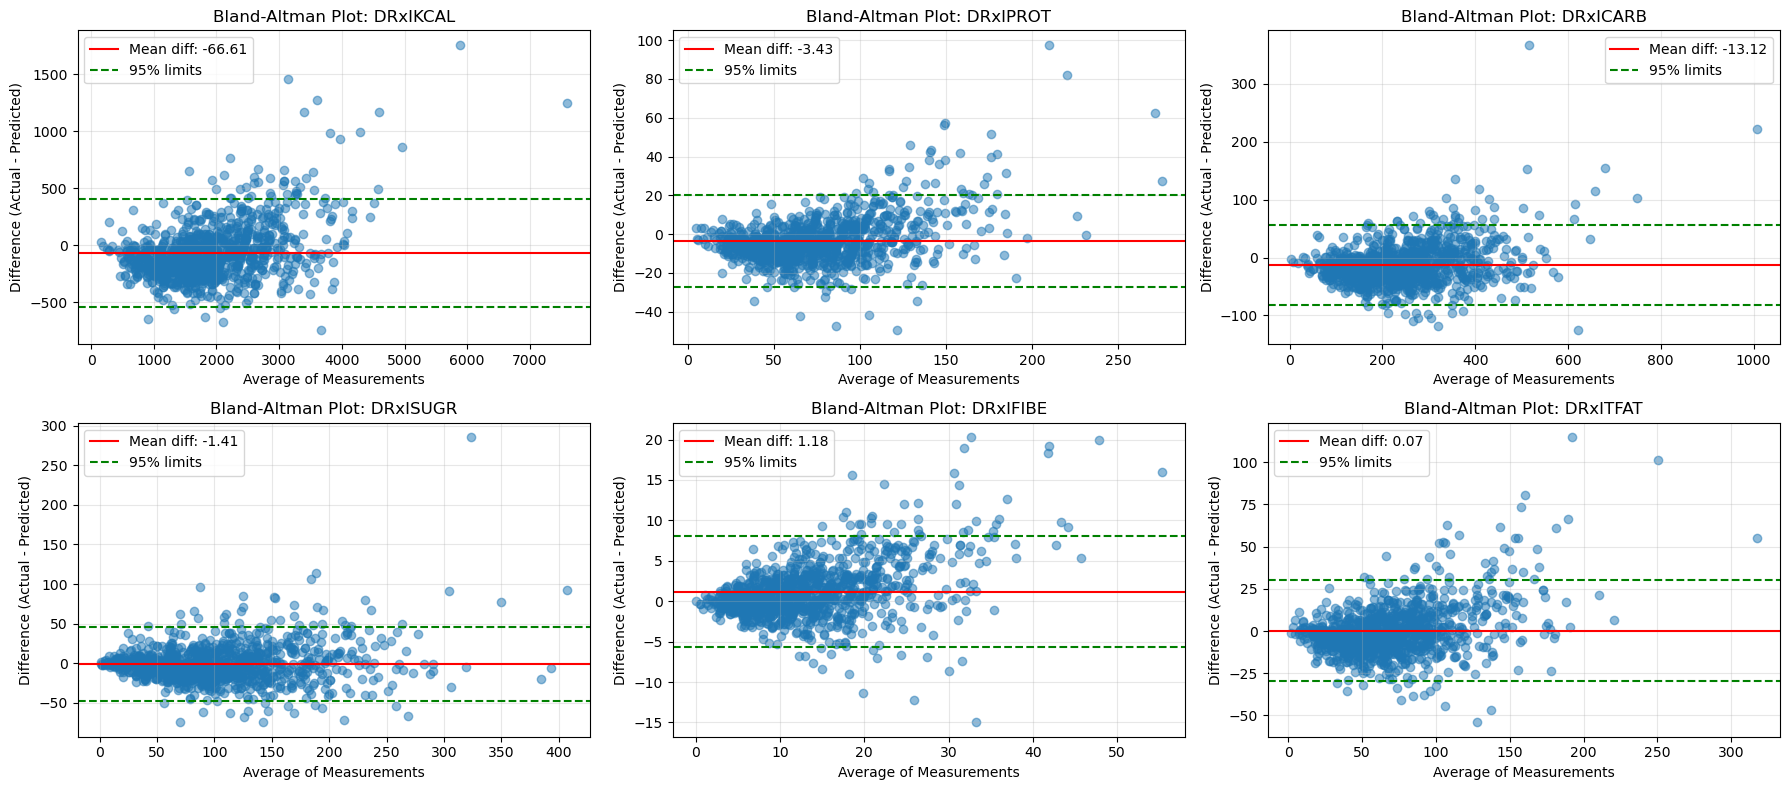

In [9]:
# Function to create Bland-Altman plot
def bland_altman_plot(measure1, measure2, title, ax):
    """Create a Bland-Altman plot comparing two measurement methods"""
    mean_diff = np.mean(measure1 - measure2)
    std_diff = np.std(measure1 - measure2)
    upper_limit = mean_diff + 1.96 * std_diff
    lower_limit = mean_diff - 1.96 * std_diff
    
    # Plot differences against averages
    avg = (measure1 + measure2) / 2
    diff = measure1 - measure2
    
    ax.scatter(avg, diff, alpha=0.5)
    ax.axhline(y=mean_diff, color='r', linestyle='-', label=f'Mean diff: {mean_diff:.2f}')
    ax.axhline(y=upper_limit, color='g', linestyle='--', label='95% limits')
    ax.axhline(y=lower_limit, color='g', linestyle='--')
    
    ax.set_xlabel('Average of Measurements')
    ax.set_ylabel('Difference (Actual - Predicted)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.legend()

# Create figure for Bland-Altman plots
fig, axes = plt.subplots(2, 3, figsize = (18, 8))
axes = axes.ravel()

# Create Bland-Altman plot for each pair
for idx, col in enumerate(base_columns):
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    bland_altman_plot(actual, predicted, f'Bland-Altman Plot: {col}', axes[idx])

plt.tight_layout()
plt.show()

# Create plots for Lin's CCC.
Ground truth vs fine-tuned mode.


Lin's Concordance Correlation Coefficient Results:
------------------------------------------------------------
Nutrient      CCC
DRxIKCAL 0.939578
DRxIPROT 0.926154
DRxICARB 0.925508
DRxISUGR 0.921817
DRxITFAT 0.908636
DRxIFIBE 0.857709

Overall Statistics:
------------------------------------------------------------
Overall CCC across all nutrients: 0.9900


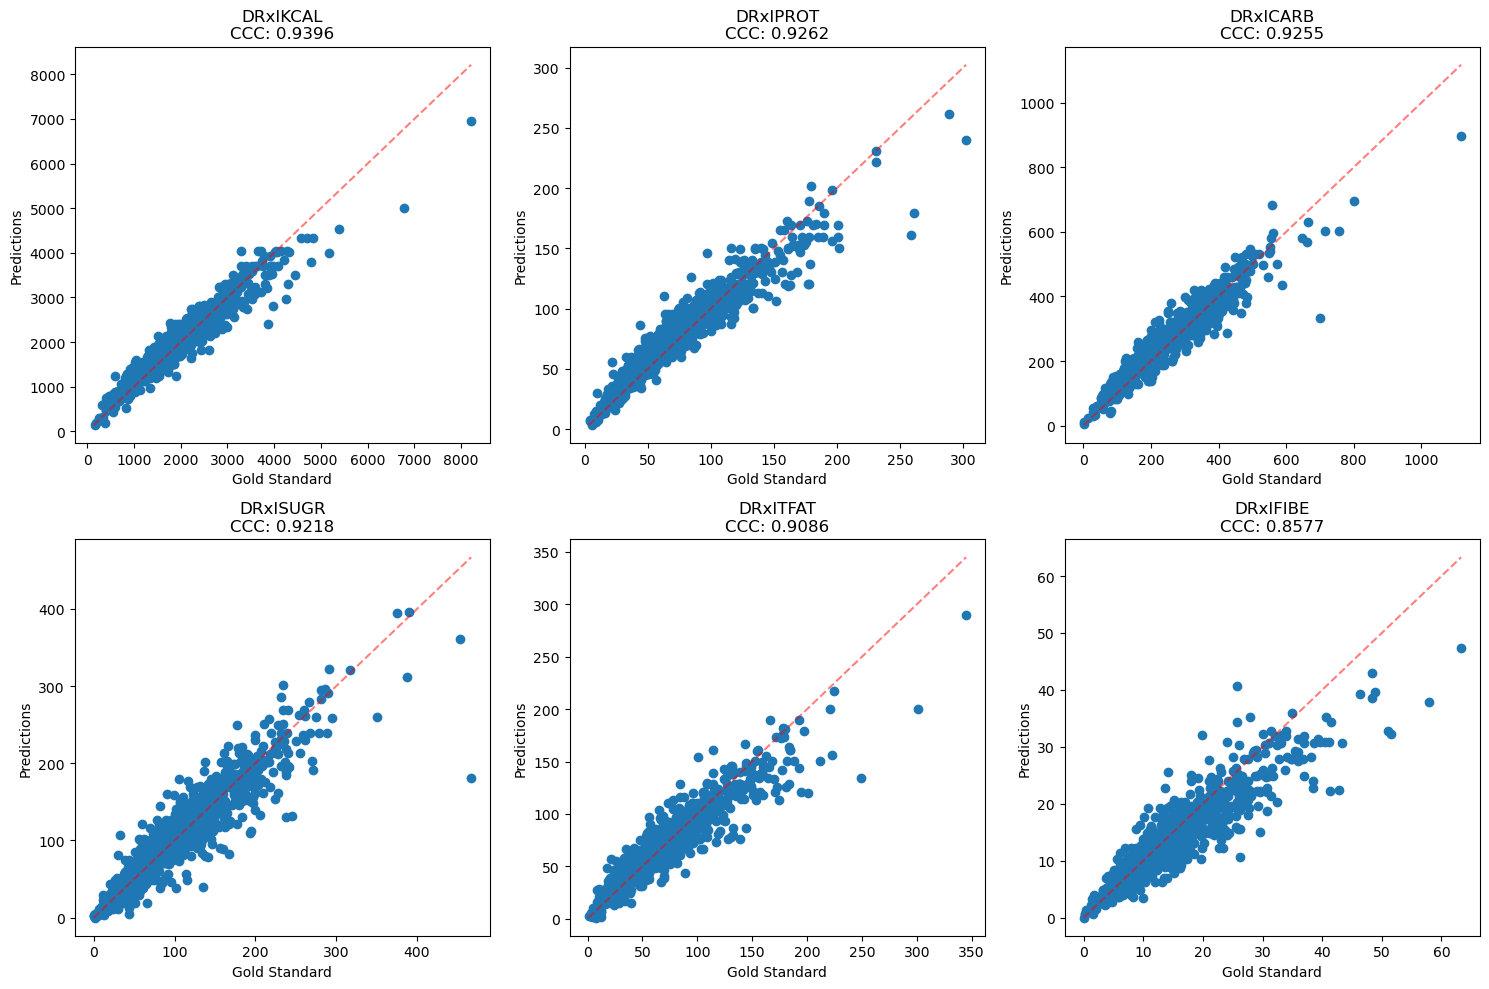

In [10]:
def lin_concordance_correlation(data1, data2):
    """
    Calculate Lin's Concordance Correlation Coefficient between two arrays.
    
    Parameters:
    data1, data2: Arrays containing paired measurements
    
    Returns:
    rho_c: Lin's Concordance Correlation Coefficient
    """
    # Calculate means
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    
    # Calculate variances
    var1 = np.var(data1)
    var2 = np.var(data2)
    
    # Calculate covariance
    cov = np.mean((data1 - mean1) * (data2 - mean2))
    
    # Calculate Pearson correlation coefficient
    rho = 2 * cov / (var1 + var2 + (mean1 - mean2)**2)
    
    # Calculate Lin's Concordance Correlation Coefficient
    rho_c = rho * np.sqrt(var1 * var2) / ((var1 + var2)/2 + (mean1 - mean2)**2)
    
    return rho_c

# List of nutrient columns
nutrients_gold = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']
nutrients_pred = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                  'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Calculate CCC for each nutrient pair
results = []
for gold_col, pred_col in zip(nutrients_gold, nutrients_pred):
    ccc = lin_concordance_correlation(df[gold_col], df[pred_col])
    results.append({
        'Nutrient': gold_col,
        'CCC': ccc
    })

# Create DataFrame with results
results_df = pd.DataFrame(results)

# Sort by CCC value
results_df = results_df.sort_values('CCC', ascending=False)

# Print results
print("\nLin's Concordance Correlation Coefficient Results:")
print("-" * 60)
print(results_df.to_string(index=False))

# Calculate overall CCC
all_gold = np.concatenate([df[col].values for col in nutrients_gold])
all_pred = np.concatenate([df[col].values for col in nutrients_pred])
overall_ccc = lin_concordance_correlation(all_gold, all_pred)

print("\nOverall Statistics:")
print("-" * 60)
print(f"Overall CCC across all nutrients: {overall_ccc:.4f}")

# Create visualization
plt.figure(figsize=(15, 10))
# Use zip with results_df.itertuples() to match sorted order
for i, row in enumerate(results_df.itertuples()):
    gold_col = row.Nutrient
    pred_col = gold_col + '_pred_ft'
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[gold_col], df[pred_col])
    plt.plot([min(min(df[gold_col]), min(df[pred_col])),
             max(max(df[gold_col]), max(df[pred_col]))],
             [min(min(df[gold_col]), min(df[pred_col])),
              max(max(df[gold_col]), max(df[pred_col]))],
             'r--', alpha=0.5)
    plt.xlabel('Gold Standard')
    plt.ylabel('Predictions')
    plt.title(f'{gold_col}\nCCC: {row.CCC:.4f}')
plt.tight_layout()
plt.show()